In [2]:
library(readxl)
library(dplyr)
library(pwr)
library(lsr)
library(ggplot2)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'pwr' was built under R version 3.6.3"Warning message:
"package 'lsr' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [67]:
secundaria_promedios <- read_excel("C:/Users/Sabrina/Downloads/Exploracion_d_multivariados/promedios_secundaria.xlsx")
primaria_promedios <- read_excel("C:/Users/Sabrina/Downloads/Exploracion_d_multivariados/promedios_primaria.xlsx")

# Ejercicio 1 Analisis de matriculas

In [10]:
diamante <- filter(secundarias, Departamento == "DIAMANTE")
diamante_cb <- diamante$Mat_ciclo_basico
diamante_co <- diamante$Mat_ciclo_orientado

#Revisamos la normalidad de los datos
shapiro.test(diamante_cb)
shapiro.test(diamante_co)

#Realizamos el Test correspondiente (Test no paramétrico)
wilcox.test(diamante_cb,diamante_co, alternative = "two.sided", conf.level = 0.95, paired = FALSE)

ERROR: Error: Problem with `filter()` input `..1`.
i Input `..1` is `Departamento == "DIAMANTE"`.
x objeto 'Departamento' no encontrado


# Ejercicio 2 Analisis de matriculas por Curso


In [ ]:
secundarias <- na.omit(secundarias)
Primero <- secundarias$Primero
Segundo <- secundarias$Segundo
Tercero <- secundarias$Tercero
Cuarto <- secundarias$Cuarto
Quinto <- secundarias$Quinto
Sexto <- secundarias$Sexto
matricula <- as.numeric(c(primero,segundo,tercero,cuarto,quinto,sexto))
curso <- as.factor(c(rep("Primero",length(Primero)), 
                     rep("Segundo",length(Segundo)),
                     rep("Tercero",length(Tercero)),
                     rep("Cuarto",length(Cuarto)),
                     rep("Quinto",length(Quinto)),
                     rep("Sexto", length(Sexto))))
matricula_curso <- data.frame(curso,matricula)
matricula_curso
matricula_curso$curso <- factor(matricula_curso$curso, levels = c("Primero","Segundo","Tercero","Cuarto","Quinto","Sexto"))

In [ ]:
boxplot(matricula_curso$matricula ~ matricula_curso$curso, 
        col = c("yellow", "blue", "orange","green","purple","brown"), 
        ylim = c(0,300),
        ylab = "Matricula por curso", 
        xlab="Cursos",
        sub="Fuente de elaboración propia",
        main="Cantidad de matriculas por curso en el departamento de Diamante")

In [ ]:
matricula_curso %>% group_by(curso) %>%
  summarise(mean = round(mean(matricula),1), datos = n())
#Genero el modelo de ANOVA
fm = aov( matricula ~ curso )
summary(fm) # pvalor < 0.05 rechazamos H0 y existe al menos una de las medias que difiere en cuanto a las otras

In [ ]:
TukeyHSD(fm, "curso", conf.level = .95)

In [ ]:
#Analizamos los supuestos
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Primero"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Segundo"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Tercero"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Cuarto"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Quinto"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Sexto"])


In [ ]:
#Test no parametrico Kruskal Wallis
kruskal.test(matricula_curso$curso,matricula_curso$matricula)

In [ ]:
#Analisis a posteriori
pairwise.wilcox.test(matricula_curso$matricula,matricula_curso$curso)

# EJERCICIO 3

Lengua

In [13]:
table(primaria_promedios$Turno)

table(primaria_promedios$Curso)


COMPLETO   DIURNO   MAÑANA ROTATIVO    TARDE 
    2630       40    22846     1277    19142 


   1    2    3    4    5    6 
9780 7741 7233 7187 6898 7096 

In [12]:
#----------------------------------- PRIMER CICLO--------------------------
primer_ciclo_mañana_L <- c(na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 1 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 2 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 3 )$Promedio))

primer_ciclo_tarde_L <- c(na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 1 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 2 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 3 )$Promedio))

primer_ciclo_otros_L <- c(na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 1 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 1 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 1 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 2 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 2 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 2 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 3 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 3 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 3)$Promedio))

#----------------------------------- SEGUNDO CICLO--------------------------
segundo_ciclo_mañana_L <- c(na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 4  )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 5 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA" & Curso == 6 )$Promedio))

segundo_ciclo_tarde_L <- c(na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 4  )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 5 )$Promedio),
                  na.omit(filter(primaria_promedios, Turno == "TARDE" & Materia == "LENGUA" & Curso == 6 )$Promedio))

segundo_ciclo_otros_L <- primer_ciclo_otros_L <- c(na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 4 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 4 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 4 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 5 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 5 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 5 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "DIURNO" & Materia == "LENGUA" & Curso == 6 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "COMPLETO" & Materia == "LENGUA" & Curso == 6 )$Promedio),
       na.omit(filter(primaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 6)$Promedio))

In [14]:
promedios_primer_ciclo_L <- as.numeric(c(primer_ciclo_mañana_L, primer_ciclo_tarde_L, primer_ciclo_otros_L))
turno_primer_ciclo_L <- as.factor(c( rep("Mañana",length(primer_ciclo_mañana_L)), 
                                     rep("Tarde",length(primer_ciclo_tarde_L)),
                                     rep("Otros", length(primer_ciclo_otros_L))))

promedios_turno_primer_ciclo_L <- data.frame(turno_primer_ciclo_L, promedios_primer_ciclo_L)

promedios_segundo_ciclo_L <- as.numeric(c(segundo_ciclo_mañana_L, segundo_ciclo_tarde_L, segundo_ciclo_otros_L))
turno_segundo_ciclo_L <- as.factor(c(rep("Mañana",length(segundo_ciclo_mañana_L)), 
                     rep("Tarde",length(segundo_ciclo_tarde_L)),
                     rep("Otros", length(segundo_ciclo_otros_L))))

promedios_turno_segundo_ciclo_L <- data.frame(turno_segundo_ciclo_L, promedios_segundo_ciclo_L)

turno_primer_ciclo_L,mean,datos
Mañana,8.0,1014
Otros,7.6,140
Tarde,8.0,1170


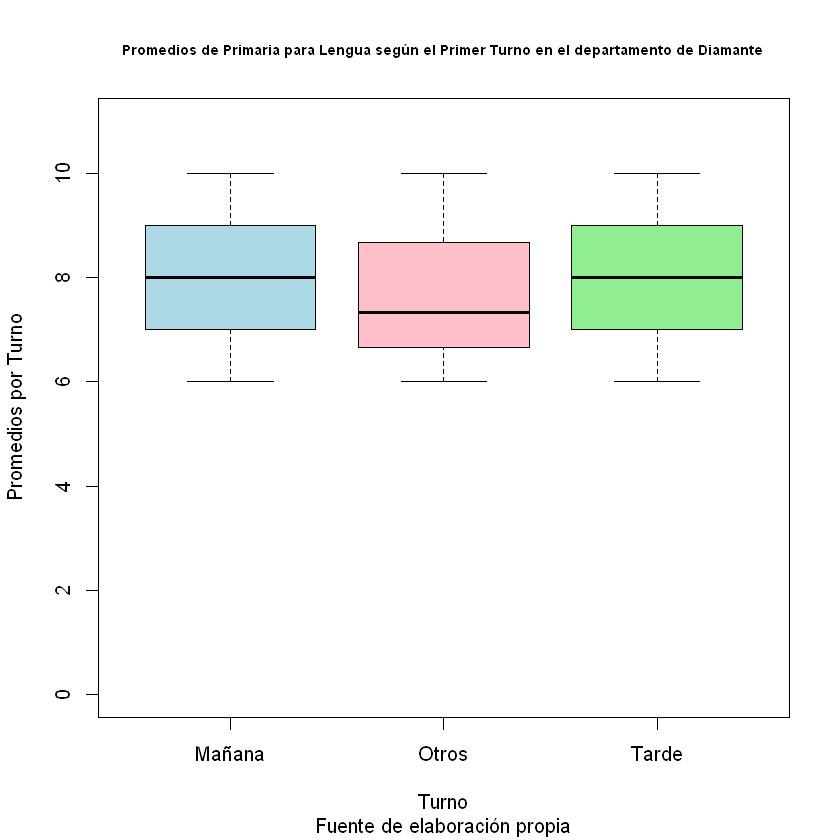

In [88]:
boxplot(promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L ~ promedios_turno_primer_ciclo_L$turno_primer_ciclo_L, 
        col = c("lightblue", "pink","lightgreen"), 
        ylim = c(0,11),
        ylab = "Promedios por Turno", 
        xlab="Turno",
        sub="Fuente de elaboración propia",
        main="Promedios de Primaria para Lengua según el Turno en el departamento de Diamante",
        cex.main = 0.7)

promedios_turno_primer_ciclo_L %>% group_by(turno_primer_ciclo_L) %>%
summarise(mean = round(mean(promedios_primer_ciclo_L),1), datos = n())

In [49]:
#Genero el modelo de ANOVA
anova_primer_ciclo_L = aov(promedios_primer_ciclo_L ~ turno_primer_ciclo_L)
summary(anova_primer_ciclo_L) 

                       Df Sum Sq Mean Sq F value   Pr(>F)    
turno_primer_ciclo_L    2   22.4  11.198    9.62 6.91e-05 ***
Residuals            2321 2701.8   1.164                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [50]:
TukeyHSD(anova_primer_ciclo_L, "turno_primer_ciclo_L", conf.level = .95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = promedios_primer_ciclo_L ~ turno_primer_ciclo_L)

$turno_primer_ciclo_L
                     diff        lwr        upr     p adj
Otros-Mañana -0.415919977 -0.6440527 -0.1877872 0.0000589
Tarde-Mañana -0.006640368 -0.1152034  0.1019227 0.9887199
Tarde-Otros   0.409279609  0.1829995  0.6355597 0.0000684


In [76]:
#Analizamos los supuestos
shapiro.test(promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L == "Mañana"])
shapiro.test(promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L == "Tarde"])
shapiro.test(promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L == "Otros"])


	Shapiro-Wilk normality test

data:  promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L ==     "Mañana"]
W = 0.9659, p-value = 1.136e-14



	Shapiro-Wilk normality test

data:  promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L ==     "Tarde"]
W = 0.96398, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L[promedios_turno_primer_ciclo_L$turno_primer_ciclo_L ==     "Otros"]
W = 0.93174, p-value = 2.715e-06


In [72]:
#Test no parametrico Kruskal Wallis
kruskal.test(promedios_turno_primer_ciclo_L$turno_primer_ciclo_L, promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L)


	Kruskal-Wallis rank sum test

data:  promedios_turno_primer_ciclo_L$turno_primer_ciclo_L and promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L
Kruskal-Wallis chi-squared = 17.354, df = 12, p-value = 0.1368


In [73]:
#Analisis a posteriori
pairwise.wilcox.test(promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L, promedios_turno_primer_ciclo_L$turno_primer_ciclo_L)


	Pairwise comparisons using Wilcoxon rank sum test 

data:  promedios_turno_primer_ciclo_L$promedios_primer_ciclo_L and promedios_turno_primer_ciclo_L$turno_primer_ciclo_L 

      Mañana  Otros  
Otros 0.00021 -      
Tarde 0.97580 0.00021

P value adjustment method: holm 

# segundo turno -> 4, 5, 6

turno_segundo_ciclo_L,mean,datos
Mañana,8.0,1156
Otros,7.6,140
Tarde,8.0,770


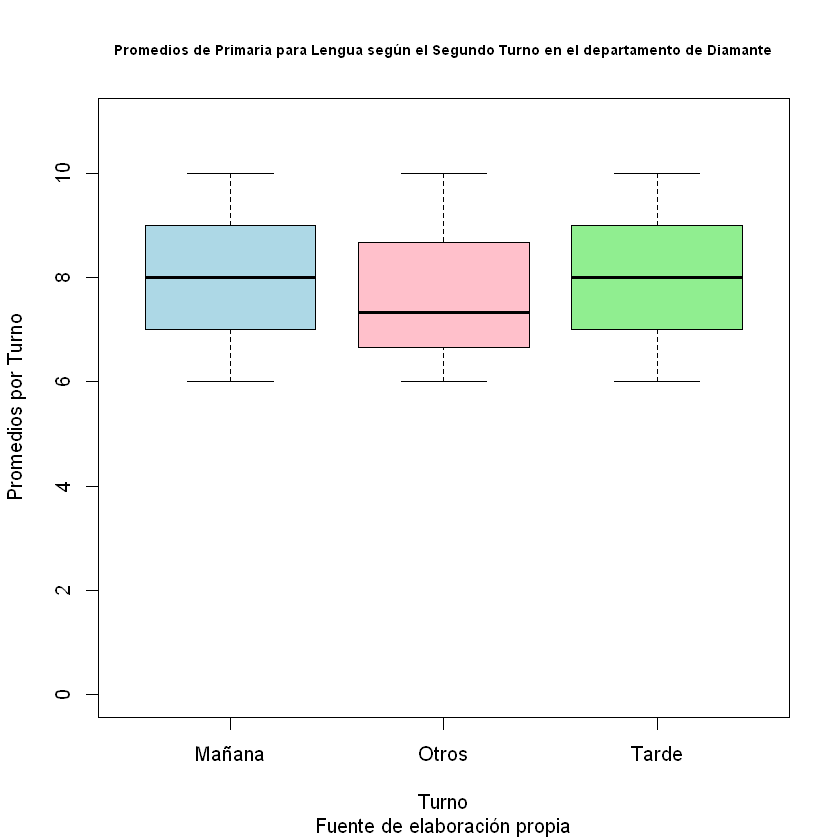

In [90]:
boxplot(promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L ~ promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L, 
        col = c("lightblue", "pink","lightgreen"), 
        ylim = c(0,11),
        ylab = "Promedios por Turno", 
        xlab="Turno",
        sub="Fuente de elaboración propia",
        main="Promedios de Primaria para Lengua según el Segundo Turno en el departamento de Diamante",
        cex.main = 0.7)

promedios_turno_segundo_ciclo_L %>% group_by(turno_segundo_ciclo_L) %>%
summarise(mean = round(mean(promedios_segundo_ciclo_L),1), datos = n())

In [42]:
#Genero el modelo de ANOVA
anova_segundo_ciclo_L = aov( promedios_segundo_ciclo_L ~ turno_segundo_ciclo_L)
summary(anova_segundo_ciclo_L) 

                        Df Sum Sq Mean Sq F value   Pr(>F)    
turno_segundo_ciclo_L    2     19   9.506   7.785 0.000428 ***
Residuals             2063   2519   1.221                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [51]:
TukeyHSD(anova_segundo_ciclo_L, "turno_segundo_ciclo_L", conf.level = .95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = promedios_segundo_ciclo_L ~ turno_segundo_ciclo_L)

$turno_segundo_ciclo_L
                     diff        lwr        upr     p adj
Otros-Mañana -0.377385072 -0.6093107 -0.1454594 0.0004096
Tarde-Mañana  0.009627915 -0.1109293  0.1301851 0.9808446
Tarde-Otros   0.387012987  0.1488904  0.6251355 0.0004170


In [80]:
#Analizamos los supuestos
shapiro.test(promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L == "Mañana"])
shapiro.test(promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L == "Tarde"])
shapiro.test(promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L == "Otros"])



	Shapiro-Wilk normality test

data:  promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L ==     "Mañana"]
W = 0.96362, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L ==     "Tarde"]
W = 0.96296, p-value = 4.791e-13



	Shapiro-Wilk normality test

data:  promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L[promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L ==     "Otros"]
W = 0.93174, p-value = 2.715e-06


In [81]:
#Test no parametrico Kruskal Wallis
kruskal.test(promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L, promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L)


	Kruskal-Wallis rank sum test

data:  promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L and promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L
Kruskal-Wallis chi-squared = 14.755, df = 12, p-value = 0.2551


In [82]:
#Analisis a posteriori
pairwise.wilcox.test(promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L, promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L)


	Pairwise comparisons using Wilcoxon rank sum test 

data:  promedios_turno_segundo_ciclo_L$promedios_segundo_ciclo_L and promedios_turno_segundo_ciclo_L$turno_segundo_ciclo_L 

      Mañana  Otros  
Otros 0.00081 -      
Tarde 0.91938 0.00081

P value adjustment method: holm 

# SECUNDARIA

In [99]:
#----------------------------------- PRIMER CICLO--------------------------
sec_primer_ciclo_mañana_L <- c(na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA Y LITERATURA" & Curso == 1 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA Y LITERATURA" & Curso == 2 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA Y LITERATURA" & Curso == 3 )$Promedio))

sec_primer_ciclo_tarde_L <- c(na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LENGUA Y LITERATURA" & Curso == 1 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LENGUA Y LITERATURA" & Curso == 2 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LENGUA Y LITERATURA" & Curso == 3 )$Promedio))

sec_primer_ciclo_otros_L <- c(na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LENGUA Y LITERATURA" & Curso == 1 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA Y LITERATURA" & Curso == 1 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LENGUA Y LITERATURA" & Curso == 2 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA" & Curso == 2 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LENGUA Y LITERATURA" & Curso == 3 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA Y LITERATURA" & Curso == 3)$Promedio))

#----------------------------------- SEGUNDO CICLO--------------------------
sec_segundo_ciclo_mañana_L <- c(na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LENGUA Y LITERATURA" & Curso == 4  )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LITERATURA LATINOAMERICANA" & Curso == 5 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "MAÑANA" & Materia == "LITERATURA ARGENTINA" & Curso == 6 )$Promedio))

sec_segundo_ciclo_tarde_L <- c(na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LENGUA Y LITERATURA" & Curso == 4  )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LITERATURA LATINOAMERICANA" & Curso == 5 )$Promedio),
                  na.omit(filter(secundaria_promedios, Turno == "TARDE" & Materia == "LITERATURA ARGENTINA" & Curso == 6 )$Promedio))

sec_segundo_ciclo_otros_L <- primer_ciclo_otros_L <- c(na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LENGUA Y LITERATURA" & Curso == 4 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LENGUA Y LITERATURA" & Curso == 4 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LITERATURA LATINOAMERICANA" & Curso == 5 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LITERATURA LATINOAMERICANA" & Curso == 5 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "DIURNO" & Materia == "LITERATURA ARGENTINA" & Curso == 6 )$Promedio),
       na.omit(filter(secundaria_promedios,Turno == "ROTATIVO" & Materia == "LITERATURA ARGENTINA" & Curso == 6)$Promedio))

In [100]:
sec_promedios_primer_ciclo_L <- as.numeric(c(sec_primer_ciclo_mañana_L, sec_primer_ciclo_tarde_L, sec_primer_ciclo_otros_L))
sec_turno_primer_ciclo_L <- as.factor(c( rep("Mañana",length(sec_primer_ciclo_mañana_L)), 
                                         rep("Tarde",length(sec_primer_ciclo_tarde_L)),
                                         rep("Otros", length(sec_primer_ciclo_otros_L))))

sec_promedios_turno_primer_ciclo_L <- data.frame(sec_turno_primer_ciclo_L, sec_promedios_primer_ciclo_L)
sec_promedios_turno_primer_ciclo_L

sec_promedios_segundo_ciclo_L <- as.numeric(c(sec_segundo_ciclo_mañana_L, sec_segundo_ciclo_tarde_L, sec_segundo_ciclo_otros_L))
sec_turno_segundo_ciclo_L <- as.factor(c(rep("Mañana",length(sec_segundo_ciclo_mañana_L)), 
                                         rep("Tarde",length(sec_segundo_ciclo_tarde_L)),
                                         rep("Otros", length(sec_segundo_ciclo_otros_L))))

sec_promedios_turno_segundo_ciclo_L <- data.frame(sec_turno_segundo_ciclo_L, sec_promedios_segundo_ciclo_L)
sec_promedios_turno_segundo_ciclo_L

sec_turno_primer_ciclo_L,sec_promedios_primer_ciclo_L
Mañana,6.000000
Mañana,5.000000
Mañana,8.000000
Mañana,5.000000
Mañana,4.666667
Mañana,5.000000
Mañana,4.333333
Mañana,5.666667
Mañana,6.333333
Mañana,4.000000


sec_turno_segundo_ciclo_L,sec_promedios_segundo_ciclo_L
Mañana,4.666667
Mañana,5.000000
Mañana,9.000000
Mañana,6.333333
Mañana,6.000000
Mañana,8.333333
Mañana,5.000000
Mañana,7.666667
Mañana,7.333333
Mañana,6.000000


# Primer turno secundaria: 1, 2, 3

sec_turno_primer_ciclo_L,mean,datos
Mañana,7.2,728
Tarde,6.6,398


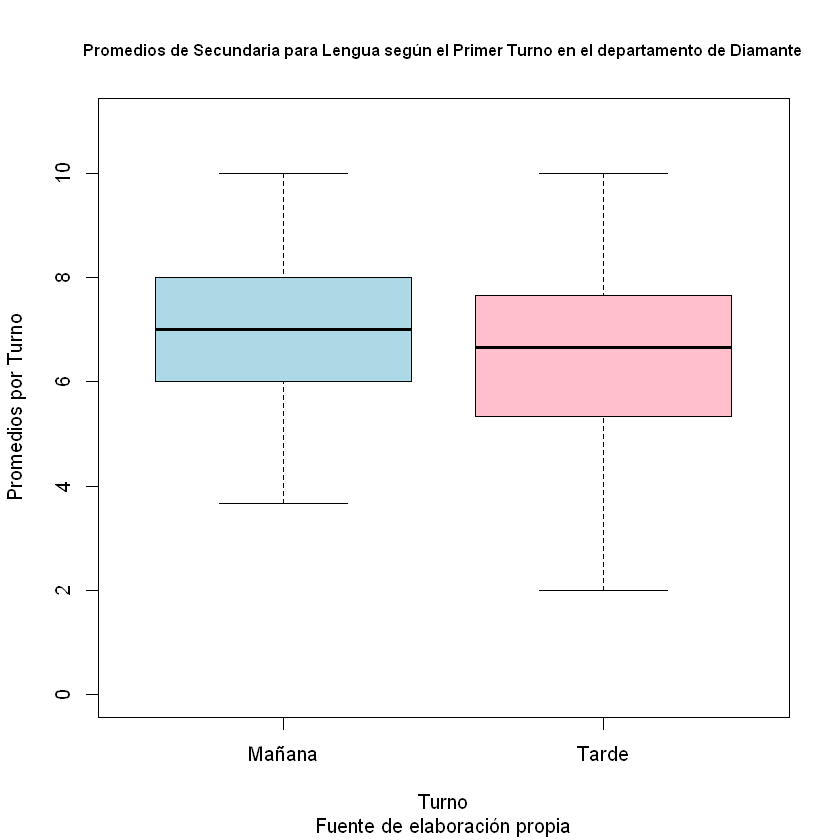

In [87]:
boxplot(sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L ~ sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L, 
        col = c("lightblue", "pink","lightgreen"), 
        ylim = c(0,11),
        ylab = "Promedios por Turno", 
        xlab="Turno",
        sub="Fuente de elaboración propia",
        main="Promedios de Secundaria para Lengua según el Primer Turno en el departamento de Diamante",
        cex.main = 0.8)

sec_promedios_turno_primer_ciclo_L %>% group_by(sec_turno_primer_ciclo_L) %>%
summarise(mean = round(mean(sec_promedios_primer_ciclo_L),1), datos = n())

In [91]:
#Genero el modelo de ANOVA
anova_sec_primer_ciclo_L = aov(sec_promedios_primer_ciclo_L ~ sec_turno_primer_ciclo_L)
summary(anova_sec_primer_ciclo_L)

                           Df Sum Sq Mean Sq F value   Pr(>F)    
sec_turno_primer_ciclo_L    1   73.4   73.43   37.53 1.24e-09 ***
Residuals                1124 2199.3    1.96                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [93]:
TukeyHSD(anova_sec_primer_ciclo_L, "sec_turno_primer_ciclo_L", conf.level = .95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sec_promedios_primer_ciclo_L ~ sec_turno_primer_ciclo_L)

$sec_turno_primer_ciclo_L
                   diff        lwr        upr p adj
Tarde-Mañana -0.5341934 -0.7052874 -0.3630994     0


In [95]:
#Analizamos los supuestos
shapiro.test(sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L[sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L == "Mañana"])
shapiro.test(sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L[sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L == "Tarde"])
#shapiro.test(sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L[sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L == "Otros"])


	Shapiro-Wilk normality test

data:  sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L[sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L ==     "Mañana"]
W = 0.98192, p-value = 7.9e-08



	Shapiro-Wilk normality test

data:  sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L[sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L ==     "Tarde"]
W = 0.98338, p-value = 0.0001551


In [96]:
#Test no parametrico Kruskal Wallis
kruskal.test(sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L, sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L)


	Kruskal-Wallis rank sum test

data:  sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L and sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L
Kruskal-Wallis chi-squared = 71.672, df = 23, p-value = 6.692e-07


In [97]:
#Analisis a posteriori
pairwise.wilcox.test(sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L, sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L)


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sec_promedios_turno_primer_ciclo_L$sec_promedios_primer_ciclo_L and sec_promedios_turno_primer_ciclo_L$sec_turno_primer_ciclo_L 

      Mañana 
Tarde 3.3e-08

P value adjustment method: holm 

# Segundo turno secundaria: 4, 5, 6

In [103]:
table(sec_promedios_turno_segundo_ciclo_L$sec_turno_segundo_ciclo_L)


Mañana  Tarde 
   531    381 

sec_turno_segundo_ciclo_L,mean,datos
Mañana,7.2,531
Tarde,7.4,381


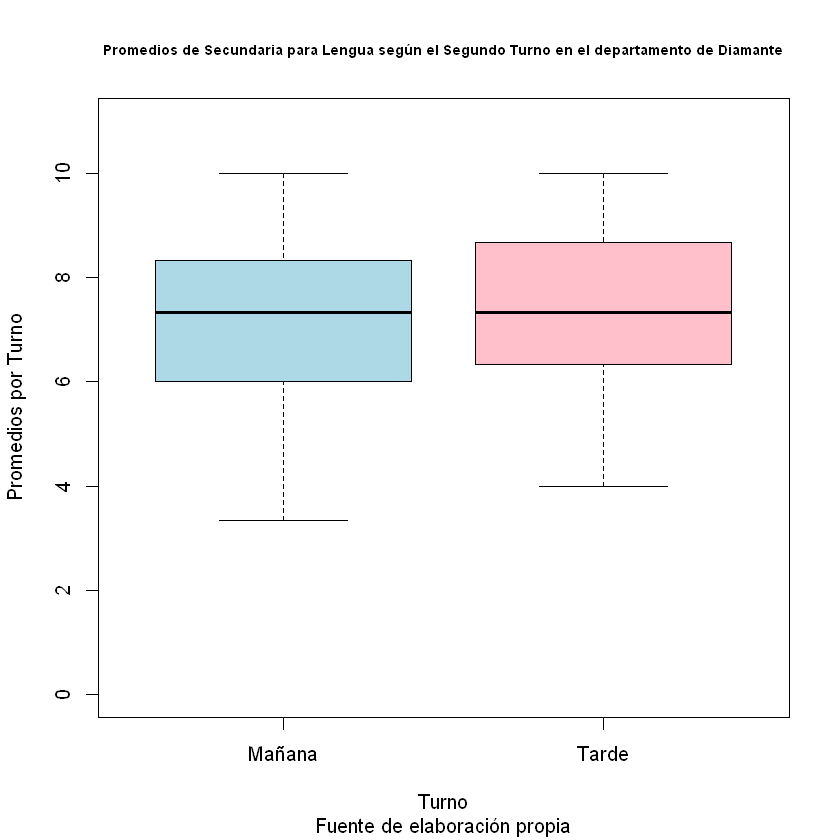

In [102]:
boxplot(sec_promedios_turno_segundo_ciclo_L$sec_promedios_segundo_ciclo_L ~ sec_promedios_turno_segundo_ciclo_L$sec_turno_segundo_ciclo_L, 
        col = c("lightblue", "pink","lightgreen"), 
        ylim = c(0,11),
        ylab = "Promedios por Turno", 
        xlab="Turno",
        sub="Fuente de elaboración propia",
        main="Promedios de Secundaria para Lengua según el Segundo Turno en el departamento de Diamante",
        cex.main = 0.7)

sec_promedios_turno_segundo_ciclo_L %>% group_by(sec_turno_segundo_ciclo_L) %>%
summarise(mean = round(mean(sec_promedios_segundo_ciclo_L),1), datos = n())